<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Tool_competence_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loaded Successfully!


<ipython-input-19-82ac1a67c79d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Bloom_level', palette='viridis')


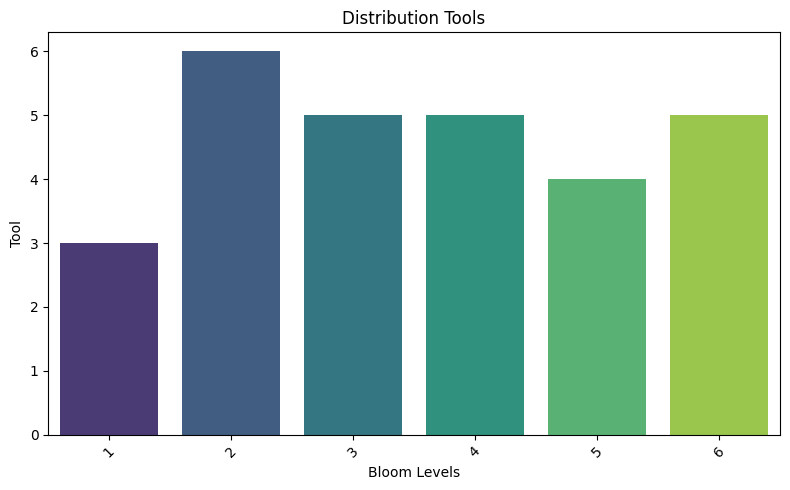

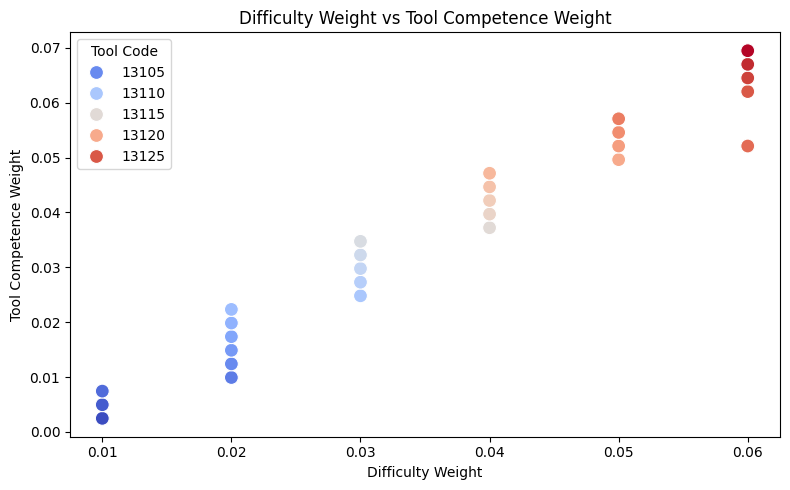

<ipython-input-19-82ac1a67c79d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Competence', y='Tool_contribution', palette='Set2')


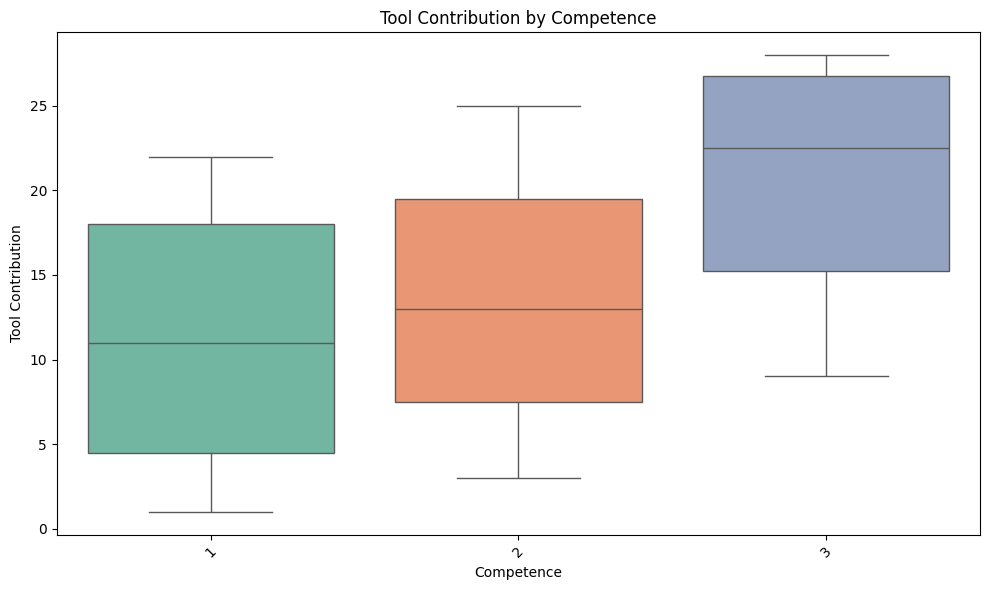

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None



# Visualize Data
def visualize_data(data):
    # Replace column names with exact names from data.columns if necessary
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x='Bloom_level', palette='viridis')
    plt.title('Distribution Tools')
    plt.xlabel('Bloom Levels')
    plt.ylabel('Tool')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    # Use exact column names from the dataset
    sns.scatterplot(data=data,
                    x='Bloom_level_weight',  # Replace with exact name
                    y='Tool_competence_weight',  # Replace with exact name
                    hue='Tool_code',  # Replace with exact name
                    palette='coolwarm',
                    s=100)
    plt.title('Difficulty Weight vs Tool Competence Weight')
    plt.xlabel('Difficulty Weight')
    plt.ylabel('Tool Competence Weight')
    plt.legend(title='Tool Code')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Competence', y='Tool_contribution', palette='Set2')
    plt.title('Tool Contribution by Competence')
    plt.xlabel('Competence')
    plt.ylabel('Tool Contribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:

        visualize_data(data)

In [20]:
pip install pandas matplotlib seaborn openpyxl


Data Loaded Successfully!

--- Data Columns ---
Index(['Bloom_level', 'Bloom_level_weight', 'Tool', 'Tool_code', 'Competence',
       'Tool_contribution', 'Tool_competence_weight', 'Tool_ECTS',
       'Tool_competence_indication'],
      dtype='object')


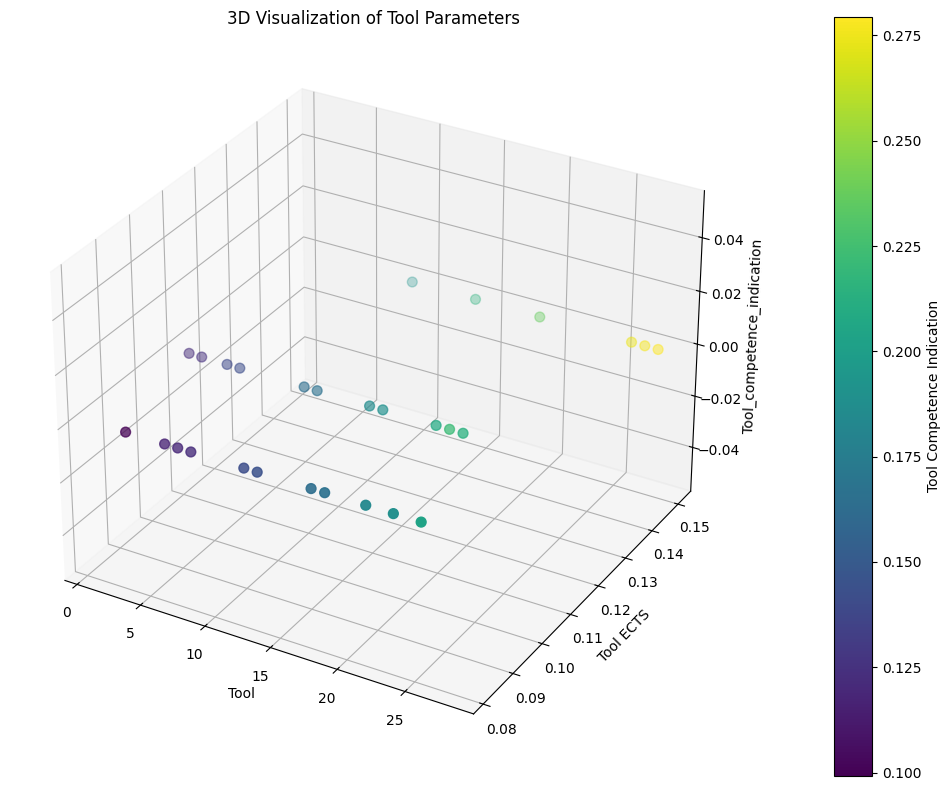

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# 3D Visualization Function
def plot_3d(data):
    # Ensure the required columns exist in the dataset
    required_columns = ['Tool_contribution', 'Tool_ECTS', 'Tool_competence_indication']
    for col in required_columns:
        if col not in data.columns:
            print(f"Missing required column: {col}")
            return

    # Convert categorical columns like Tool_code into numeric for plotting
    data['Tool_code_numeric'] = pd.factorize(data['Tool_code'])[0]  # Encode Tool_code

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        data['Tool_contribution'],
        data['Tool_ECTS'],
        c=data['Tool_competence_indication'],
        cmap='viridis',
        s=50
    )

    # Adding color bar to indicate Tool_competence_indication
    cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Tool Competence Indication')

    # Set axis labels
    ax.set_xlabel('Tool')
    ax.set_ylabel('Tool ECTS')
    ax.set_zlabel('Tool_competence_indication')
    ax.set_title('3D Visualization of Tool Parameters')

    # Show plot
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:
        print("\n--- Data Columns ---")
        print(data.columns)
        plot_3d(data)


Data Loaded Successfully!


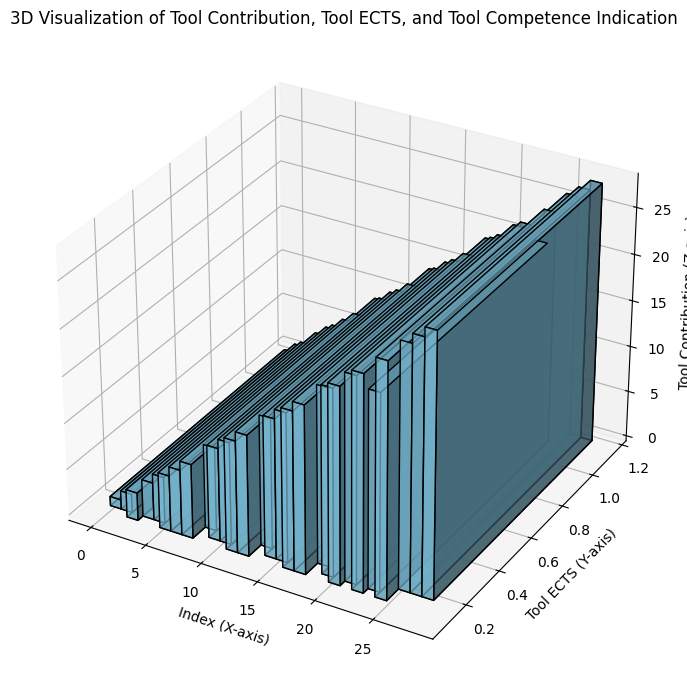

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# Visualize Data in 3D
def visualize_data_3d(data):
    # Ensure that these columns exist and match exactly with your dataset
    tool_contribution = data['Tool_contribution']  # Replace with correct column name
    tool_ects = data['Tool_ECTS']  # Replace with correct column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with correct column name

    # Check if all columns exist
    if tool_contribution.isnull().any() or tool_ects.isnull().any() or tool_competence_indication.isnull().any():
        print("Warning: Some columns contain missing values!")

    # Prepare data for plotting
    x = np.arange(len(tool_contribution))  # X-axis based on the number of entries
    y = tool_ects  # Use Tool ECTS values for Y-axis
    z = tool_contribution  # Use Tool Contribution for Z-axis

    # Create 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Create 3D bars (X, Y, Z, width, depth, color)
    ax.bar3d(x, y, np.zeros_like(z), 1, 1, z, color='skyblue', edgecolor='k', alpha=0.7)

    # Set labels for each axis
    ax.set_xlabel('Index (X-axis)')
    ax.set_ylabel('Tool ECTS (Y-axis)')
    ax.set_zlabel('Tool Contribution (Z-axis)')

    # Title and layout adjustments
    ax.set_title('3D Visualization of Tool Contribution, Tool ECTS, and Tool Competence Indication')
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:
        visualize_data_3d(data)



Data Loaded Successfully!


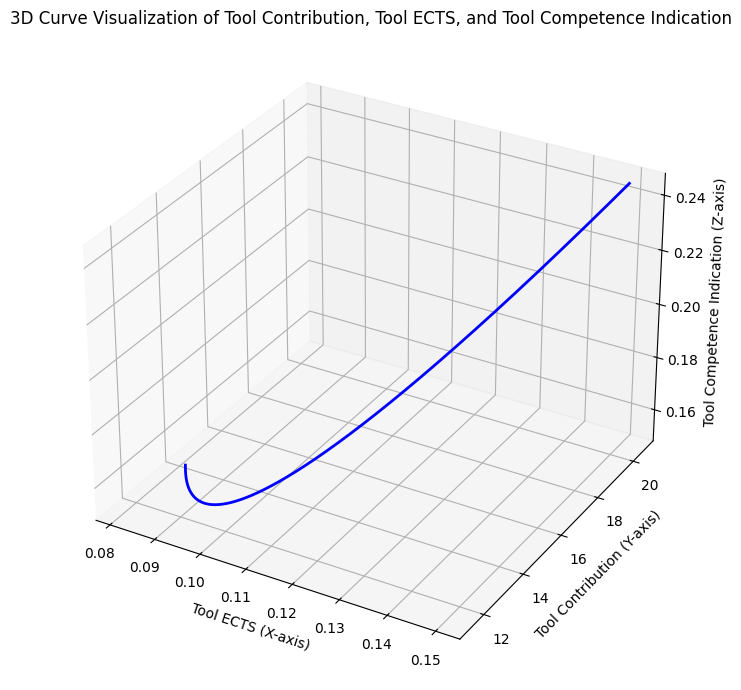

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import make_interp_spline

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# Visualize Data as 3D Curve
def visualize_data_3d_curve(data):
    # Ensure that these columns exist and match exactly with your dataset
    tool_contribution = data['Tool_contribution']  # Replace with correct column name
    tool_ects = data['Tool_ECTS']  # Replace with correct column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with correct column name

    # Check if any columns have missing values
    if tool_contribution.isnull().any() or tool_ects.isnull().any() or tool_competence_indication.isnull().any():
        print("Warning: Some columns contain missing values!")

    # Handle duplicate values in tool_ects by averaging the corresponding values in other columns
    data_grouped = data.groupby('Tool_ECTS').agg({
        'Tool_contribution': 'mean',  # Or another aggregation function like 'sum', 'max', etc.
        'Tool_competence_indication': 'mean'  # Or another aggregation function
    }).reset_index()

    # Now use the grouped data for interpolation
    tool_contribution = data_grouped['Tool_contribution']
    tool_ects = data_grouped['Tool_ECTS']
    tool_competence_indication = data_grouped['Tool_competence_indication']

    # Ensure tool_ects is strictly increasing for interpolation:
    # 1. Sort by 'tool_ects'

    # Reset index to ensure sequential x values
    data_sorted = data_grouped.sort_values(by=['Tool_ECTS']).reset_index(drop=True)

    # Update tool_ects, tool_contribution and tool_competence_indication
    tool_ects = data_sorted['Tool_ECTS']
    tool_contribution = data_sorted['Tool_contribution']
    tool_competence_indication = data_sorted['Tool_competence_indication']

    # Create a smooth curve using interpolation (reduced k to 2 to accommodate fewer data points)
    spline_contrib = make_interp_spline(tool_ects, tool_contribution, k=2)  # Cubic spline for smooth curve
    spline_competence = make_interp_spline(tool_ects, tool_competence_indication, k=2)  # Another spline

    # Create a new range for the X-axis (Tool ECTS values)
    x_new = np.linspace(tool_ects.min(), tool_ects.max(), 500)

    # Get the smooth y and z values for the new x range
    y_new = spline_contrib(x_new)
    z_new = spline_competence(x_new)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D curve
    ax.plot3D(x_new, y_new, z_new, color='b', lw=2)

    # Set labels for each axis
    ax.set_xlabel('Tool ECTS (X-axis)')
    ax.set_ylabel('Tool Contribution (Y-axis)')
    ax.set_zlabel('Tool Competence Indication (Z-axis)')

    # Title and layout adjustments
    ax.set_title('3D Curve Visualization of Tool Contribution, Tool ECTS, and Tool Competence Indication')
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:
        visualize_data_3d_curve(data)



Data Loaded Successfully!


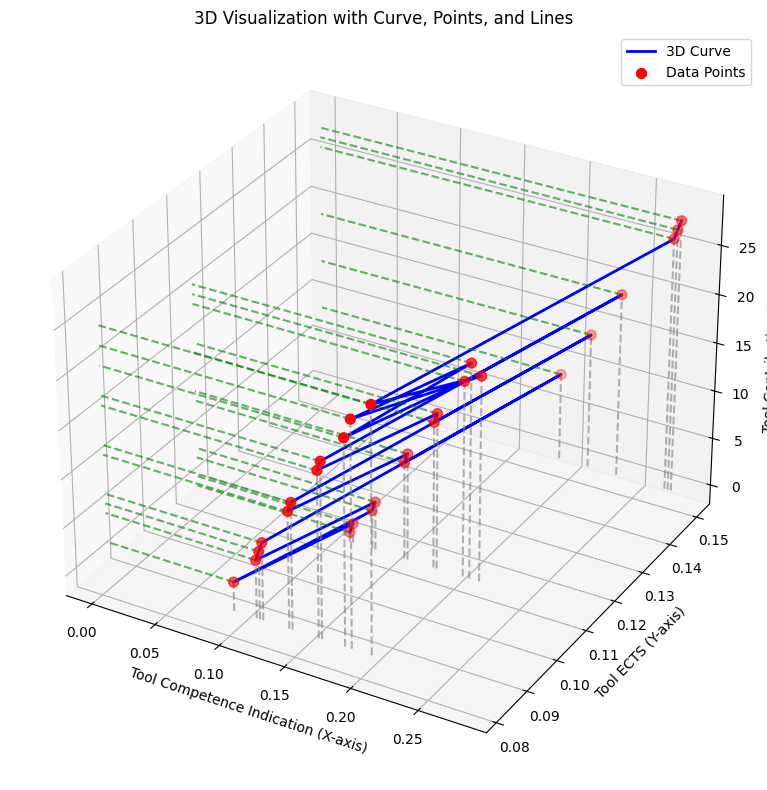

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# Visualize Data in 3D
def visualize_data_with_curve(data):
    # Ensure that these columns exist and match exactly with your dataset
    tool_contribution = data['Tool_contribution']  # Replace with correct column name
    tool_ects = data['Tool_ECTS']  # Replace with correct column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with correct column name

    # Check for missing values
    if tool_contribution.isnull().any() or tool_ects.isnull().any() or tool_competence_indication.isnull().any():
        print("Warning: Some columns contain missing values!")

    # Prepare data for plotting
    x = tool_competence_indication  # Use Tool Competence Indication for X-axis
    y = tool_ects  # Use Tool ECTS for Y-axis
    z = tool_contribution  # Use Tool Contribution for Z-axis

    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the curve
    ax.plot(x, y, z, color='blue', label='3D Curve', linewidth=2)

    # Plot points on the curve
    ax.scatter(x, y, z, color='red', label='Data Points', s=50)

    # Add vertical and horizontal lines
    for xi, yi, zi in zip(x, y, z):
        # Vertical line to the XY plane (Z=0)
        ax.plot([xi, xi], [yi, yi], [0, zi], color='gray', linestyle='dashed', alpha=0.6)
        # Horizontal line to the YZ plane (X=0)
        ax.plot([xi, 0], [yi, yi], [zi, zi], color='green', linestyle='dashed', alpha=0.6)

    # Set labels for each axis
    ax.set_xlabel('Tool Competence Indication (X-axis)')
    ax.set_ylabel('Tool ECTS (Y-axis)')
    ax.set_zlabel('Tool Contribution (Z-axis)')

    # Title and legend
    ax.set_title('3D Visualization with Curve, Points, and Lines')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:
        visualize_data_with_curve(data)



Data Loaded Successfully!


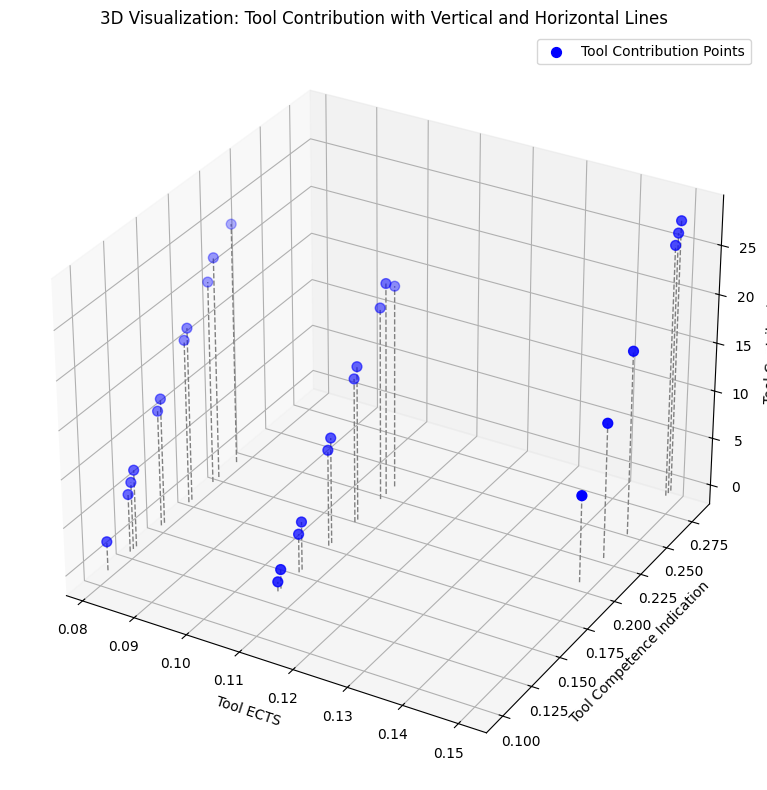

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# Visualize Data in 3D
def visualize_data_3d_with_lines(data):
    # Ensure that these columns exist and match exactly with your dataset
    tool_contribution = data['Tool_contribution']  # Replace with correct column name
    tool_ects = data['Tool_ECTS']  # Replace with correct column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with correct column name

    # Check for missing values
    if tool_contribution.isnull().any() or tool_ects.isnull().any() or tool_competence_indication.isnull().any():
        print("Warning: Some columns contain missing values!")

    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points in 3D space
    ax.scatter(tool_ects, tool_competence_indication, tool_contribution,
               c='blue', marker='o', s=50, label='Tool Contribution Points')

    # Add horizontal lines connecting points
    for i in range(len(tool_contribution)):
        ax.plot([tool_ects[i], tool_ects[i]],
                [tool_competence_indication[i], tool_competence_indication[i]],
                [0, tool_contribution[i]],
                color='gray', linestyle='--', linewidth=1)

    # Set axis labels
    ax.set_xlabel('Tool ECTS')
    ax.set_ylabel('Tool Competence Indication')
    ax.set_zlabel('Tool Contribution')

    # Set a title for the plot
    ax.set_title('3D Visualization: Tool Contribution with Vertical and Horizontal Lines')

    # Add legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with your file path
    data = load_data(file_path)

    if data is not None:
        visualize_data_3d_with_lines(data)

Data Loaded Successfully!


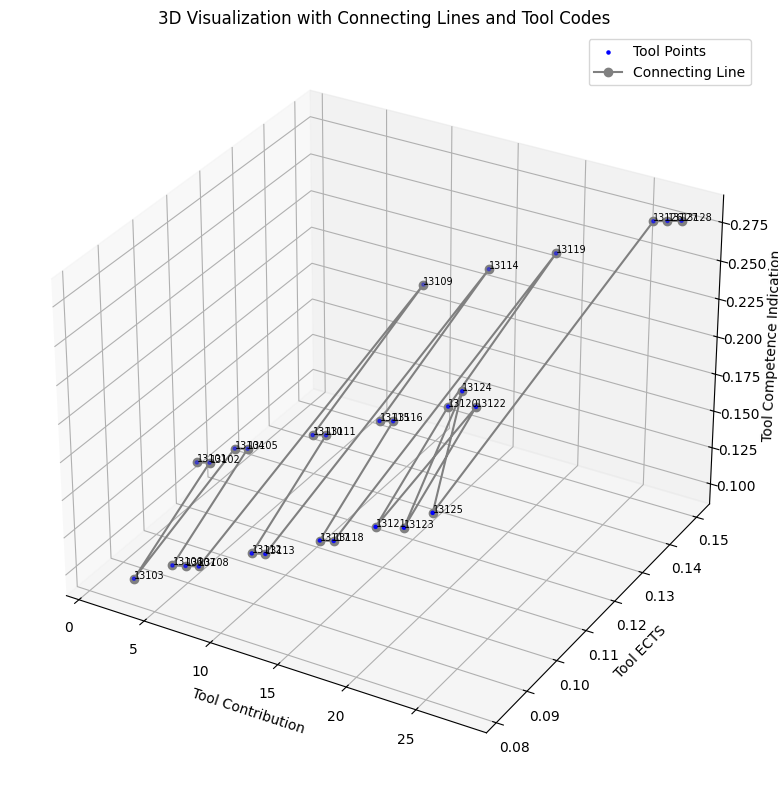

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Excel Data
def load_data(file_path):
    try:
        data = pd.read_excel(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# 3D Visualization with Connecting Lines and Axes
def visualize_3d_with_lines(data):
    # Ensure column names are correct
    tool_code = data['Tool_code']  # Replace with exact column name
    tool_contribution = data['Tool_contribution']  # Replace with exact column name
    tool_ects = data['Tool_ECTS']  # Replace with exact column name
    tool_competence_indication = data['Tool_competence_indication']  # Replace with exact column name

    # Create 3D figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(tool_contribution, tool_ects, tool_competence_indication,
               c='blue', s=5, label='Tool Points', depthshade=True)

    # Annotate points with Tool_code
    for i in range(len(tool_code)):
        ax.text(tool_contribution[i], tool_ects[i], tool_competence_indication[i],
                f'{tool_code[i]}', fontsize=7, color='black')

    # Plot each data point as a vertical line and a horizontal line connecting to others
    for i in range(len(tool_contribution)):
        x = [tool_ects[i]]  # Horizontal line starting point for X
        y = [tool_competence_indication[i]]  # Horizontal line starting point for Y
        z = [0, tool_code[i]]  # Vertical line from 0 to Tool Contribution

    # Connecting line between points
    ax.plot(tool_contribution, tool_ects, tool_competence_indication,
            color='gray', linestyle='-', marker='o', label='Connecting Line')

    # Set axis labels
    ax.set_xlabel('Tool Contribution')
    ax.set_ylabel('Tool ECTS')
    ax.set_zlabel('Tool Competence Indication')

    # Title and legend
    ax.set_title('3D Visualization with Connecting Lines and Tool Codes')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = "/content/rke131-5122024.xlsx"  # Update with the path to your Excel file
    data = load_data(file_path)

    if data is not None:
        visualize_3d_with_lines(data)
